In this file we explore the data to find which features are correlated with the target variable.

Partially taken from the benchmark code at https://drivendata.co/blog/dengue-benchmark/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('data/dengue_features_train.csv')
y = pd.read_csv('data/dengue_labels_train.csv')
data = pd.merge(X, y, on=['city', 'year', 'weekofyear'])
data.drop(['week_start_date'], axis=1, inplace=True)  # still not a feature
data.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [3]:
# Split on city
data_sj = data[data.city == 'sj']
data_iq = data[data.city == 'iq']
data_sj.drop(['city'], axis=1, inplace=True)
data_iq.drop(['city'], axis=1, inplace=True)

C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_4840\1885359546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sj.drop(['city'], axis=1, inplace=True)
C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_4840\1885359546.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iq.drop(['city'], axis=1, inplace=True)


In [4]:
# Compute the correlation matrix
corr_sj = data_sj.corr()
corr_iq = data_iq.corr()

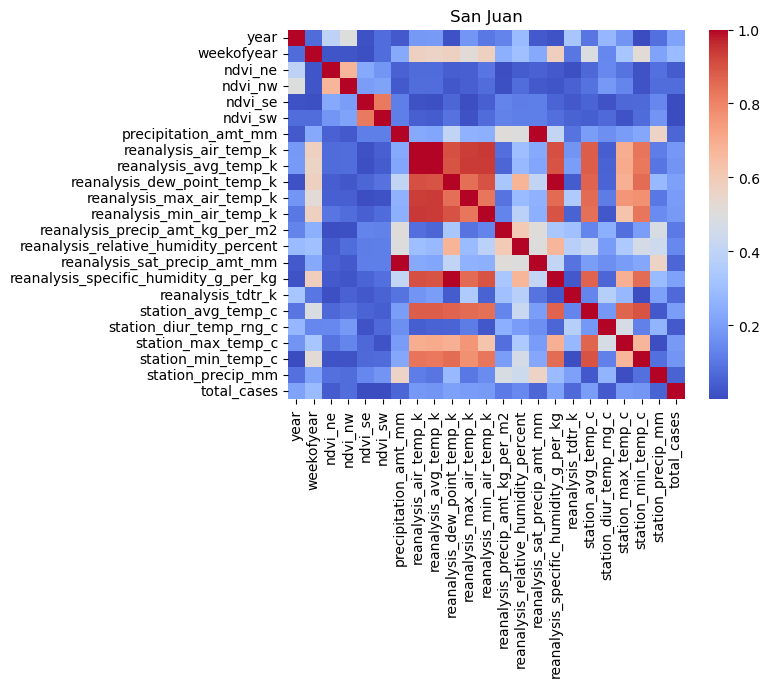

In [5]:
# Plot the heatmap for absolute values
sns.heatmap(corr_sj.abs(), cmap='coolwarm')
plt.title('San Juan')
plt.show()

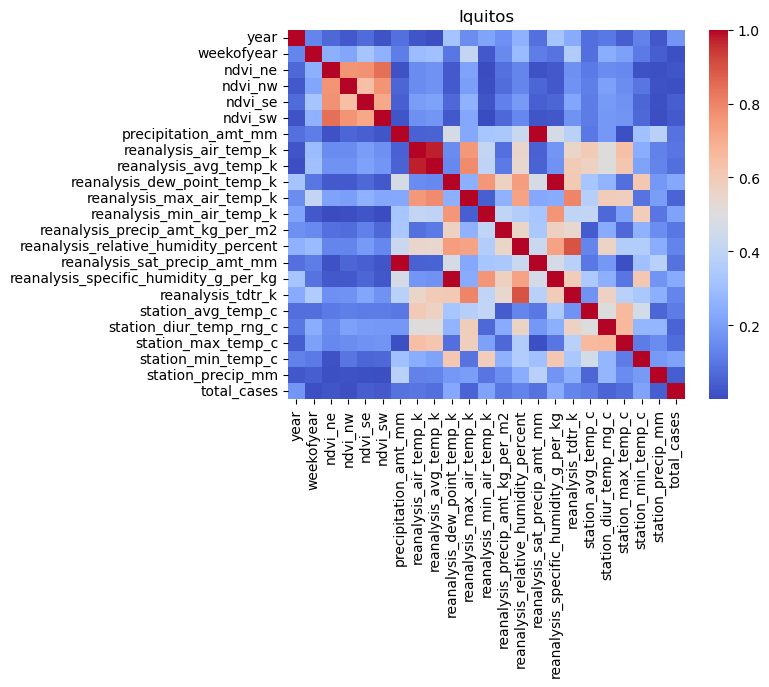

In [6]:
# Other city
sns.heatmap(corr_iq.abs(), cmap='coolwarm')
plt.title('Iquitos')
plt.show()

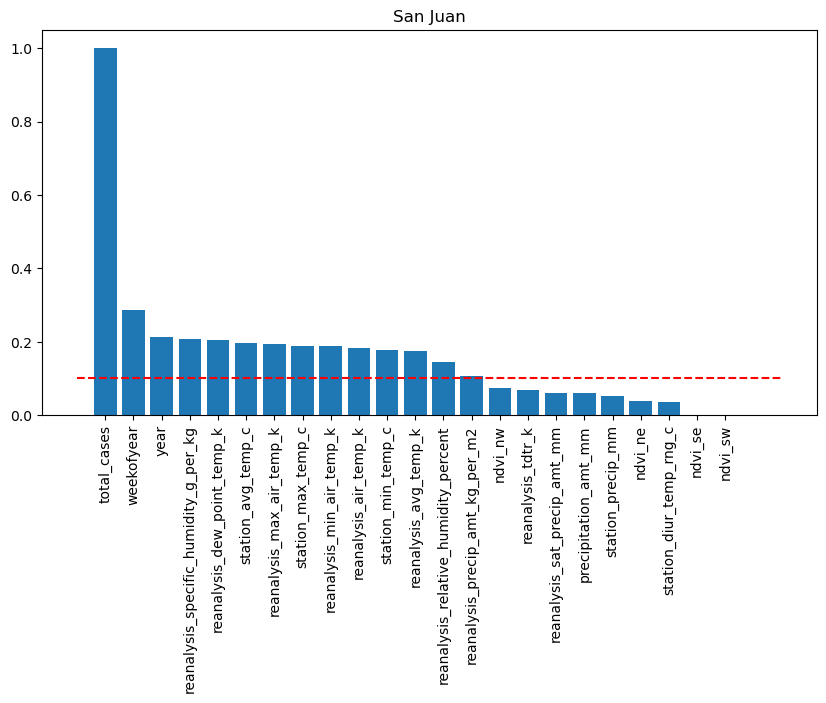

In [7]:
# Get the values for total cases
corr_sj_total_cases = corr_sj.total_cases
corr_iq_total_cases = corr_iq.total_cases

# Absolute values
corr_sj_total_cases = np.abs(corr_sj_total_cases)
corr_iq_total_cases = np.abs(corr_iq_total_cases)

# Sort the values
corr_sj_total_cases = corr_sj_total_cases.sort_values(ascending=False)
corr_iq_total_cases = corr_iq_total_cases.sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(corr_sj_total_cases.index, corr_sj_total_cases)
plt.xticks(rotation=90)
plt.title('San Juan')
plt.hlines(0.1, -1, 24, colors='r', linestyles='dashed')
plt.show()

In [8]:
features_sj = list(corr_sj_total_cases.index)[1:14]  # seem to be the most important features

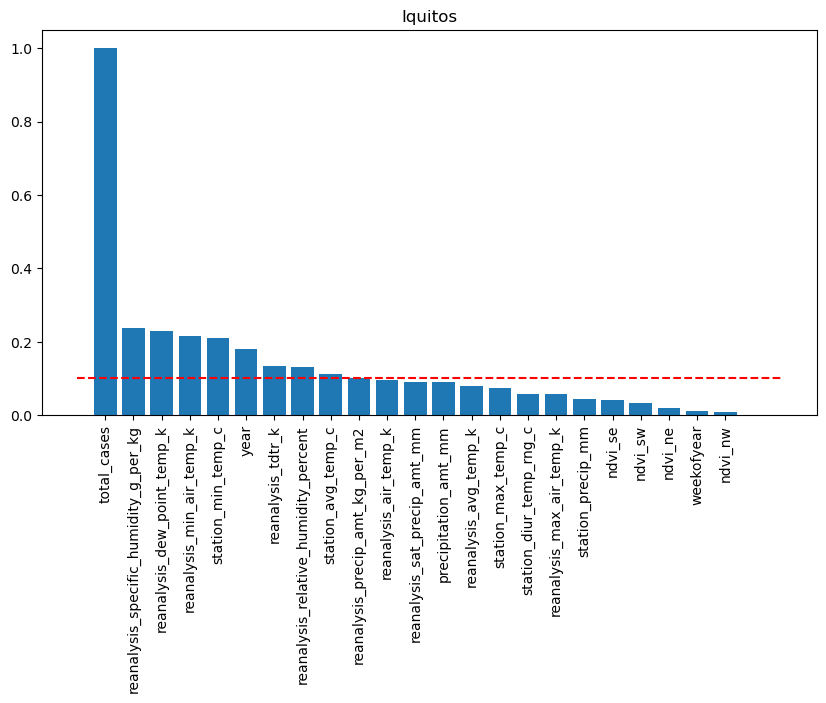

In [9]:
# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(corr_iq_total_cases.index, corr_iq_total_cases)
plt.xticks(rotation=90)
plt.title('Iquitos')
plt.hlines(0.1, -1, 24, colors='r', linestyles='dashed')
plt.show()

features_iq = list(corr_iq_total_cases.index)[1:10]  # seem to be the most important features

You can see here that the correlation with the target is quite bad, so it will be difficult to predict it.

Do the same for preprocessed data.

In [10]:
X_train_prep = pd.read_csv('prep_data/X_train_prep.csv')
y_train_prep = pd.read_csv('prep_data/y_train_prep.csv')
X_valid_prep = pd.read_csv('prep_data/X_valid_prep.csv')
y_valid_prep = pd.read_csv('prep_data/y_valid_prep.csv')

X_prep = pd.concat([X_train_prep, X_valid_prep])
y_prep = pd.concat([y_train_prep, y_valid_prep])

data_prep = pd.concat([X_prep, y_prep], axis=1)
data_prep.head()

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear_sin,weekofyear_cos,city_iq,city_sj,total_cases
0,1995,0.073900,0.115067,0.145200,0.154743,19.43,297.110000,297.085714,292.821429,299.6,...,25.257143,6.757143,31.7,21.1,16.5,0.970942,0.239316,0,1,7
1,2002,0.268029,0.142429,0.288671,0.185071,35.02,297.884286,298.950000,296.390000,307.4,...,27.650000,9.450000,34.0,22.9,57.2,-0.239316,0.970942,1,0,29
2,2002,-0.070450,-0.021333,0.219286,0.224543,1.07,300.547143,300.678571,295.912857,302.5,...,28.228571,6.900000,32.8,23.3,16.3,-0.464723,-0.885456,0,1,3
3,2007,0.143086,0.207157,0.168457,0.274314,93.62,297.031429,298.092857,296.014286,304.8,...,27.400000,9.500000,33.5,22.1,97.1,0.935016,-0.354605,1,0,5
4,2000,0.231100,0.230875,0.159100,0.087300,25.96,296.315714,296.450000,290.998571,298.4,...,25.071429,5.557143,28.9,21.1,0.8,0.970942,0.239316,0,1,8


In [11]:
# Split on city
data_sj_prep = data_prep[data_prep.city_sj == 1]
data_iq_prep = data_prep[data_prep.city_sj == 0]
data_sj_prep.drop(['city_sj', 'city_iq'], axis=1, inplace=True)
data_iq_prep.drop(['city_sj', 'city_iq'], axis=1, inplace=True)
data_sj_prep.head()

C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_4840\2082713312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sj_prep.drop(['city_sj', 'city_iq'], axis=1, inplace=True)
C:\Users\Marco van der Ploeg\AppData\Local\Temp\ipykernel_4840\2082713312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iq_prep.drop(['city_sj', 'city_iq'], axis=1, inplace=True)


,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear_sin,weekofyear_cos,total_cases
0,1995,0.07390,0.115067,0.145200,0.154743,19.43,297.110000,297.085714,292.821429,299.6,...,14.304286,2.057143,25.257143,6.757143,31.7,21.1,16.5,9.709418e-01,0.239316,7
2,2002,-0.07045,-0.021333,0.219286,0.224543,1.07,300.547143,300.678571,295.912857,302.5,...,17.260000,2.614286,28.228571,6.900000,32.8,23.3,16.3,-4.647232e-01,-0.885456,3
4,2000,0.23110,0.230875,0.159100,0.087300,25.96,296.315714,296.450000,290.998571,298.4,...,12.738571,2.357143,25.071429,5.557143,28.9,21.1,0.8,9.709418e-01,0.239316,8
5,1996,0.07600,0.108975,0.269933,0.222771,177.58,297.598571,297.707143,293.731429,299.6,...,15.128571,2.300000,25.557143,7.214286,29.4,21.1,4.6,8.854560e-01,0.464723,23
6,1991,0.12355,0.123700,0.137933,0.129756,0.00,296.521429,296.507143,292.045714,299.2,...,13.635714,2.214286,24.357143,6.185714,28.3,19.4,13.7,6.432491e-16,1.000000,70


In [12]:
# Compute the correlation matrix
corr_sj_prep = data_sj_prep.corr()
corr_iq_prep = data_iq_prep.corr()

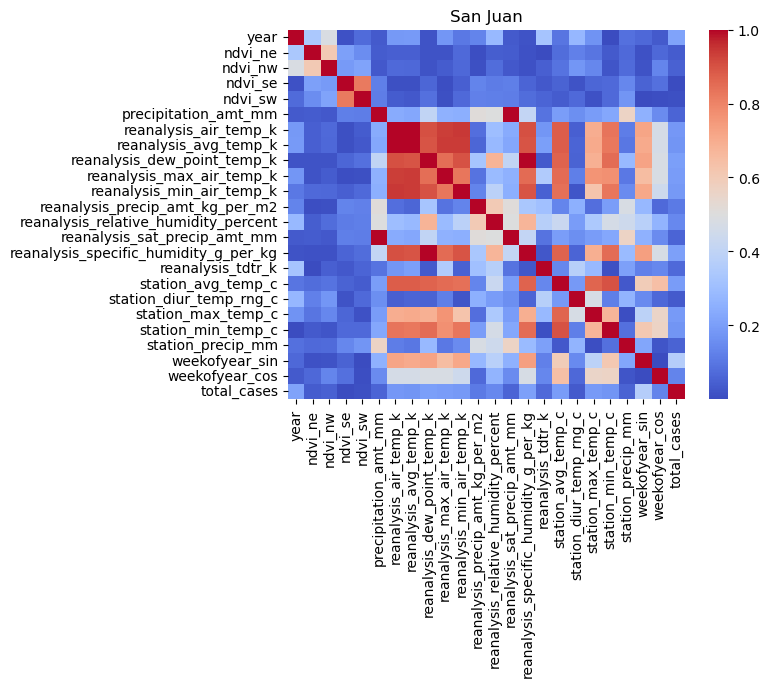

In [13]:
# Plot the heatmap for absolute values
sns.heatmap(corr_sj_prep.abs(), cmap='coolwarm')
plt.title('San Juan')
plt.show()

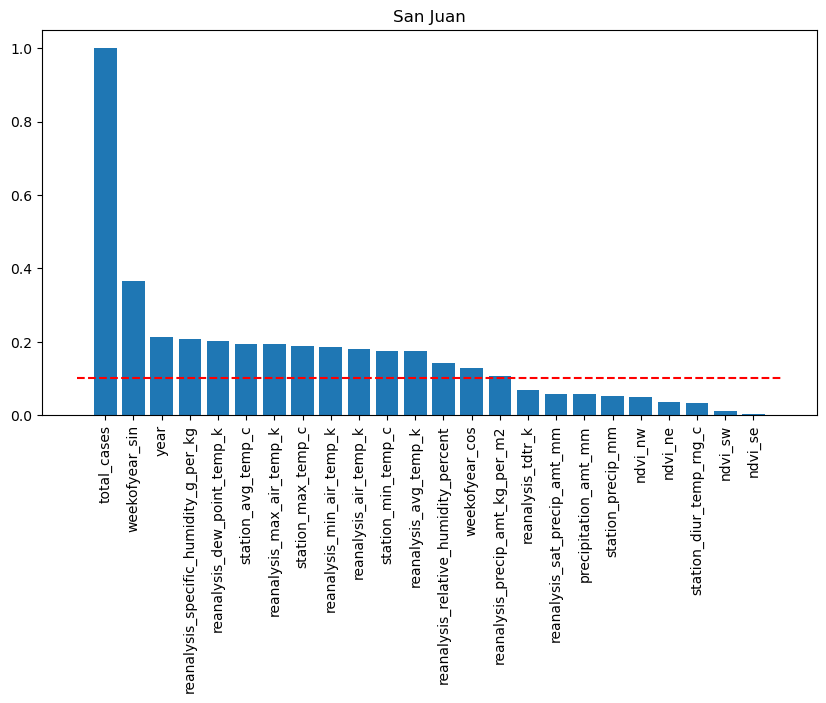

In [14]:
# Get the values for total cases
corr_sj_total_cases_prep = corr_sj_prep.total_cases
corr_iq_total_cases_prep = corr_iq_prep.total_cases

# Absolute values
corr_sj_total_cases_prep = np.abs(corr_sj_total_cases_prep)
corr_iq_total_cases_prep = np.abs(corr_iq_total_cases_prep)

# Sort the values
corr_sj_total_cases_prep = corr_sj_total_cases_prep.sort_values(ascending=False)
corr_iq_total_cases_prep = corr_iq_total_cases_prep.sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(corr_sj_total_cases_prep.index, corr_sj_total_cases_prep)
plt.xticks(rotation=90)
plt.title('San Juan')
plt.hlines(0.1, -1, 24, colors='r', linestyles='dashed')
plt.show()

features_sj_prep = list(corr_sj_total_cases_prep.index)[1:15]  # seem to be the most important features

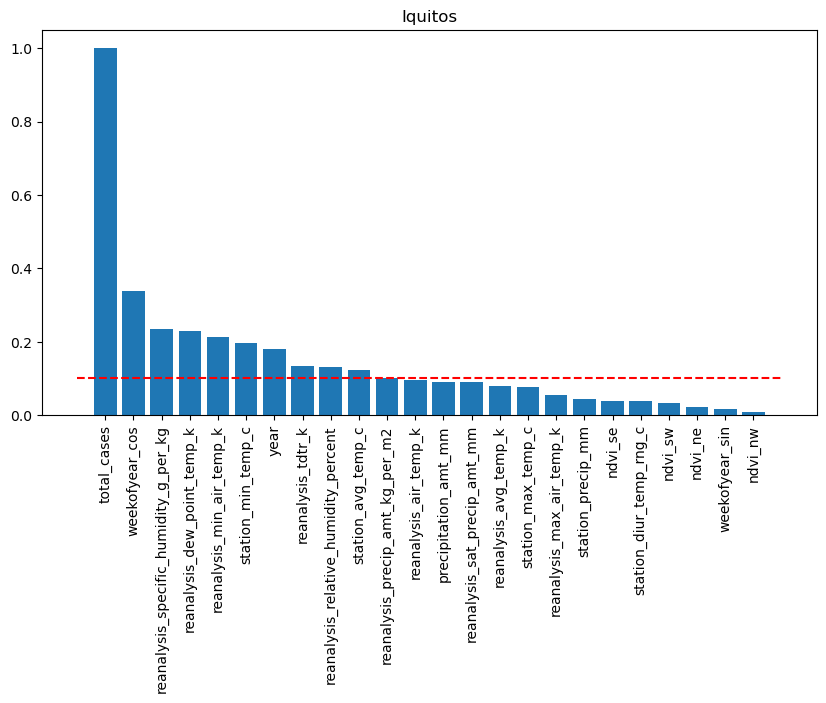

In [15]:
# Bar plot
plt.figure(figsize=(10, 5))
plt.bar(corr_iq_total_cases_prep.index, corr_iq_total_cases_prep)
plt.xticks(rotation=90)
plt.title('Iquitos')
plt.hlines(0.1, -1, 24, colors='r', linestyles='dashed')
plt.show()

features_iq_prep = list(corr_iq_total_cases_prep.index)[1:11]  # seem to be the most important features

In [16]:
print(features_sj)
print(features_sj_prep)
print()
print(features_iq)
print(features_iq_prep)

['weekofyear', 'year', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_max_air_temp_k', 'station_max_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 'station_min_temp_c', 'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_precip_amt_kg_per_m2']
['weekofyear_sin', 'year', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_max_air_temp_k', 'station_max_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_air_temp_k', 'station_min_temp_c', 'reanalysis_avg_temp_k', 'reanalysis_relative_humidity_percent', 'weekofyear_cos', 'reanalysis_precip_amt_kg_per_m2']

['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c', 'year', 'reanalysis_tdtr_k', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c', 'reanalysis_precip_amt_kg_per_m2']
['weekofyear_cos', 'reanalysis_specific

See that for San Juan, the same featues are important before and after preprocessing, although weekofyear is replaced by the trig features.

For Iquitos, the raw weekofyear was not important but the weekofyear_cos is. All other features are the same before and after preprocessing.

In [18]:
# Also let's plot the distributions of features for X and X_test to see differences
X_test = pd.read_csv('data/dengue_features_test.csv')

X_test.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


In [19]:
X.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


So the first point is that X ranges from years 1990 to 2010, while X_test from 2008 to 2013. So apart from being further ahead in time, there are many years in the training data not appearing in the test data.

Then perhaps dropping early years could be useful. Or just taking out the year feature completely.

Other features seem pretty close, and have large standard deviations if not, so that there do not seem to be statistically significant differences.